# Project Part 1 (10pts)
## ME 334: Advanced Dynamics, Control and System Identification
### Stanford University

In [1]:
#%matplotlib notebook
%matplotlib inline

# Pendulums Dynamics


<!--
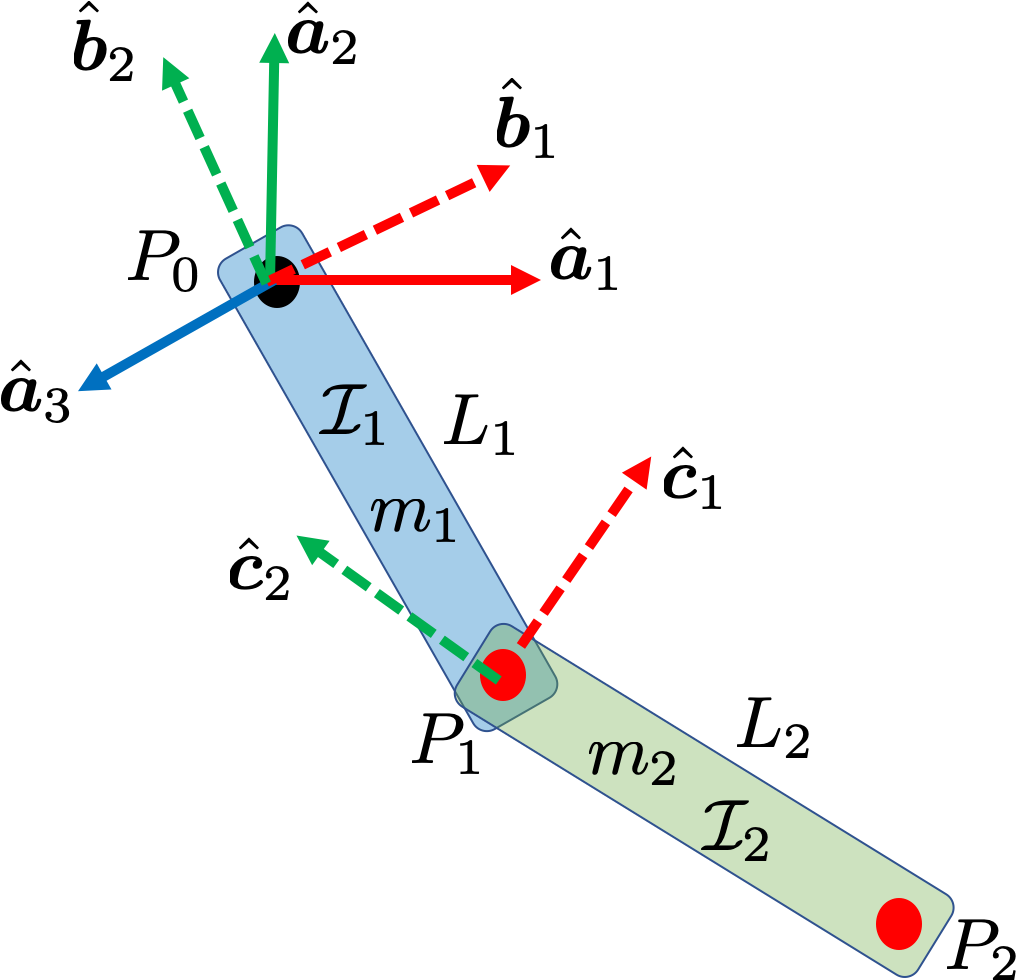
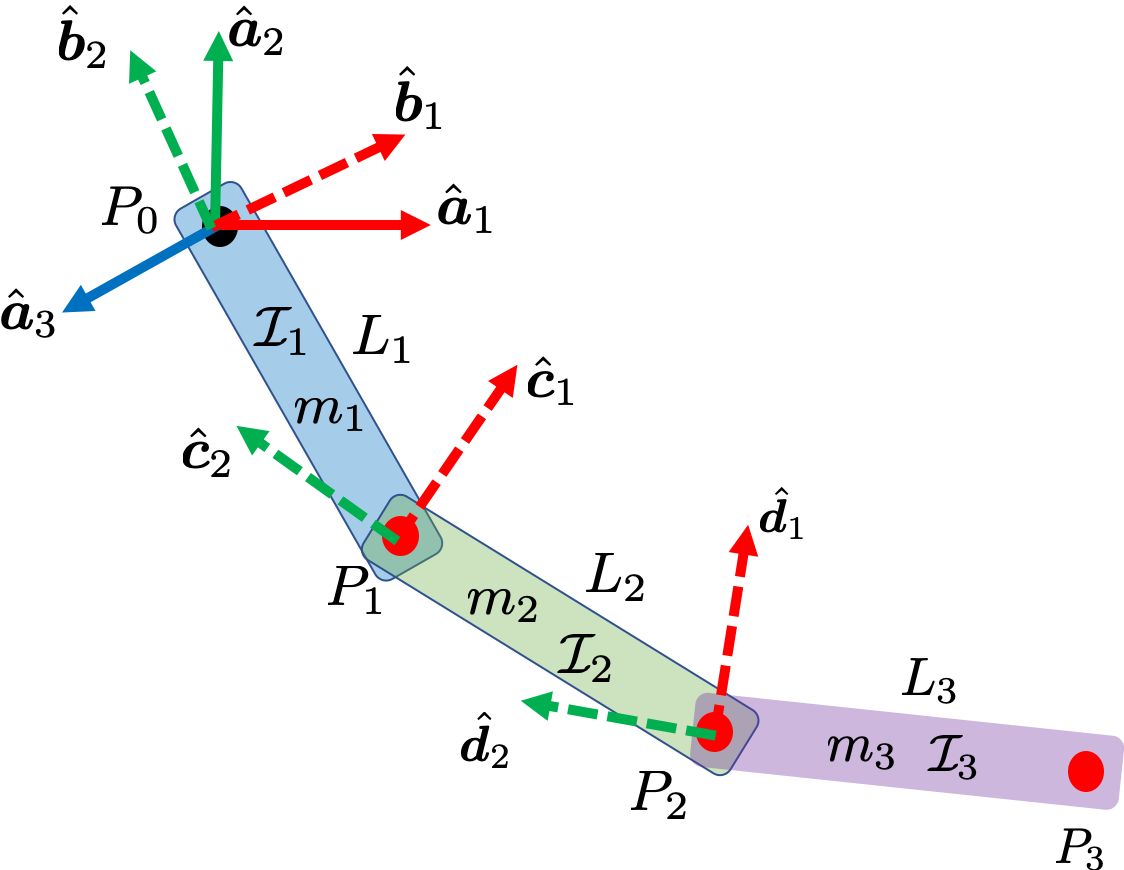
-->
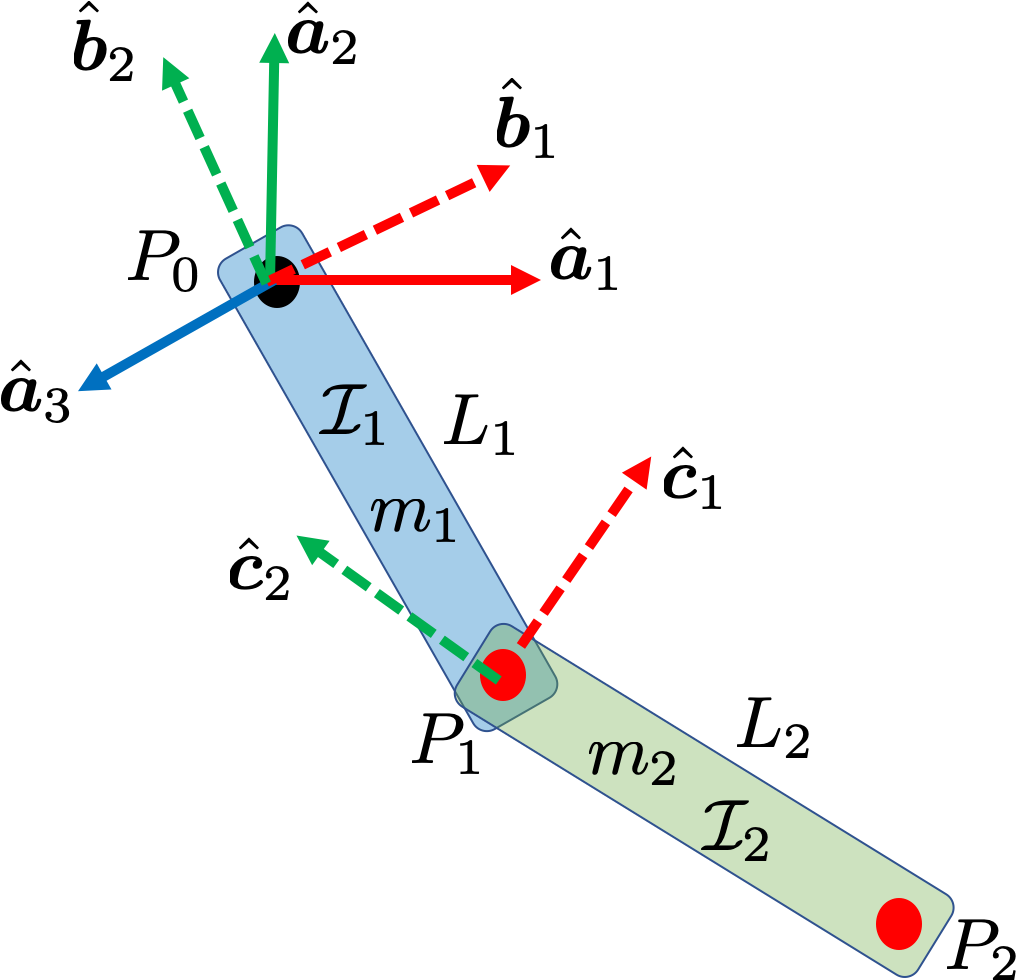
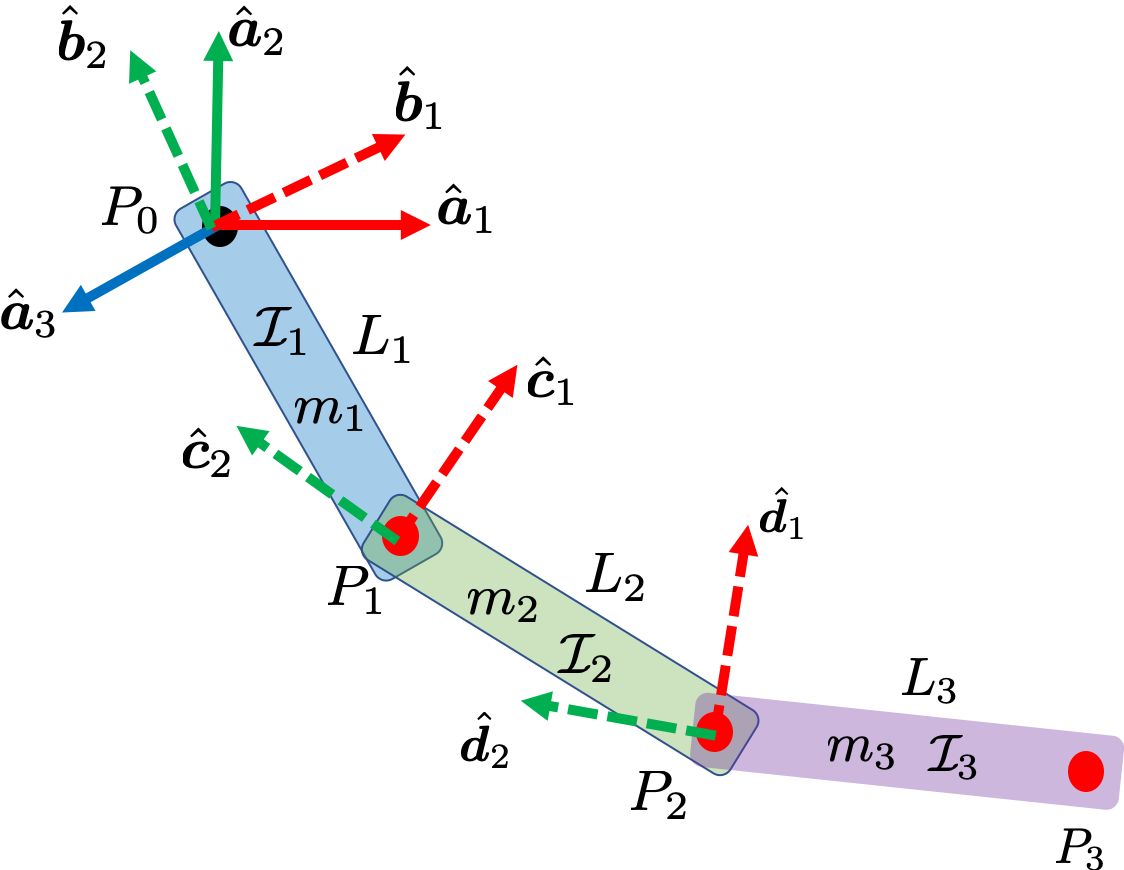

<!--
<div>
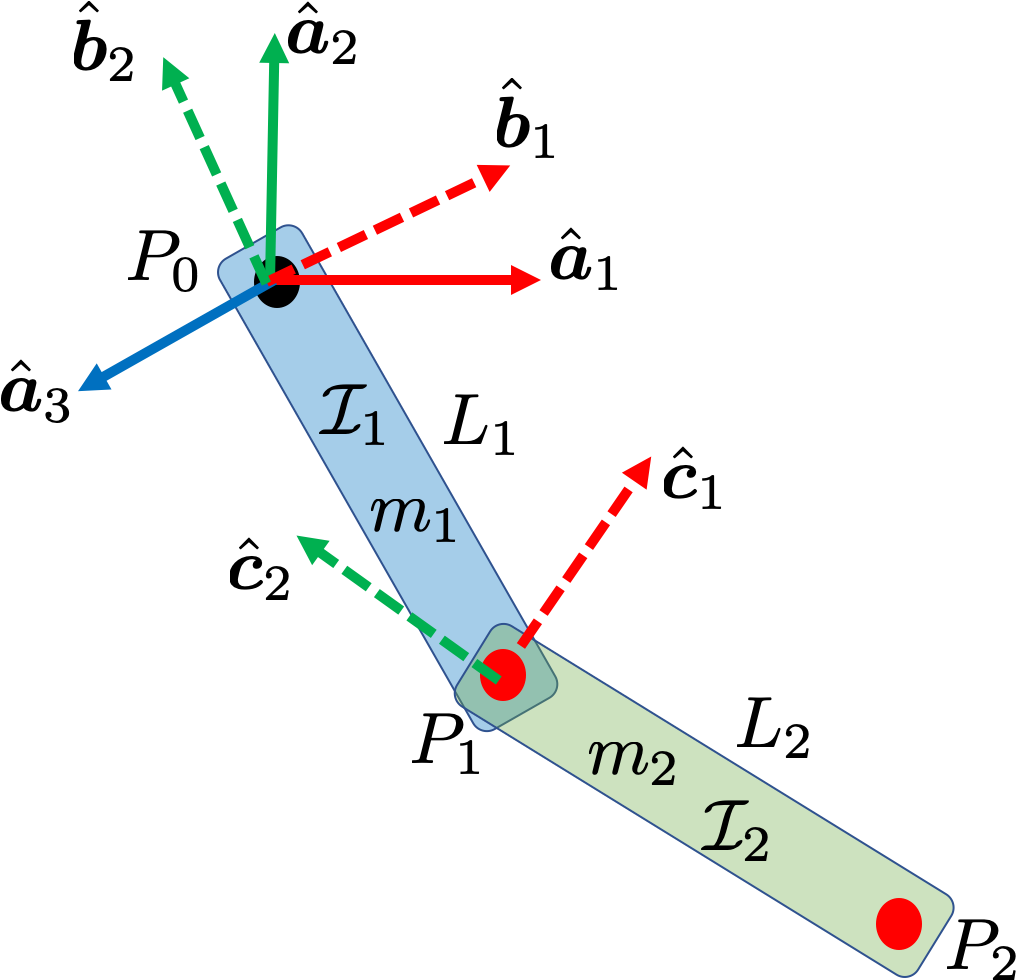
</div>
<div>
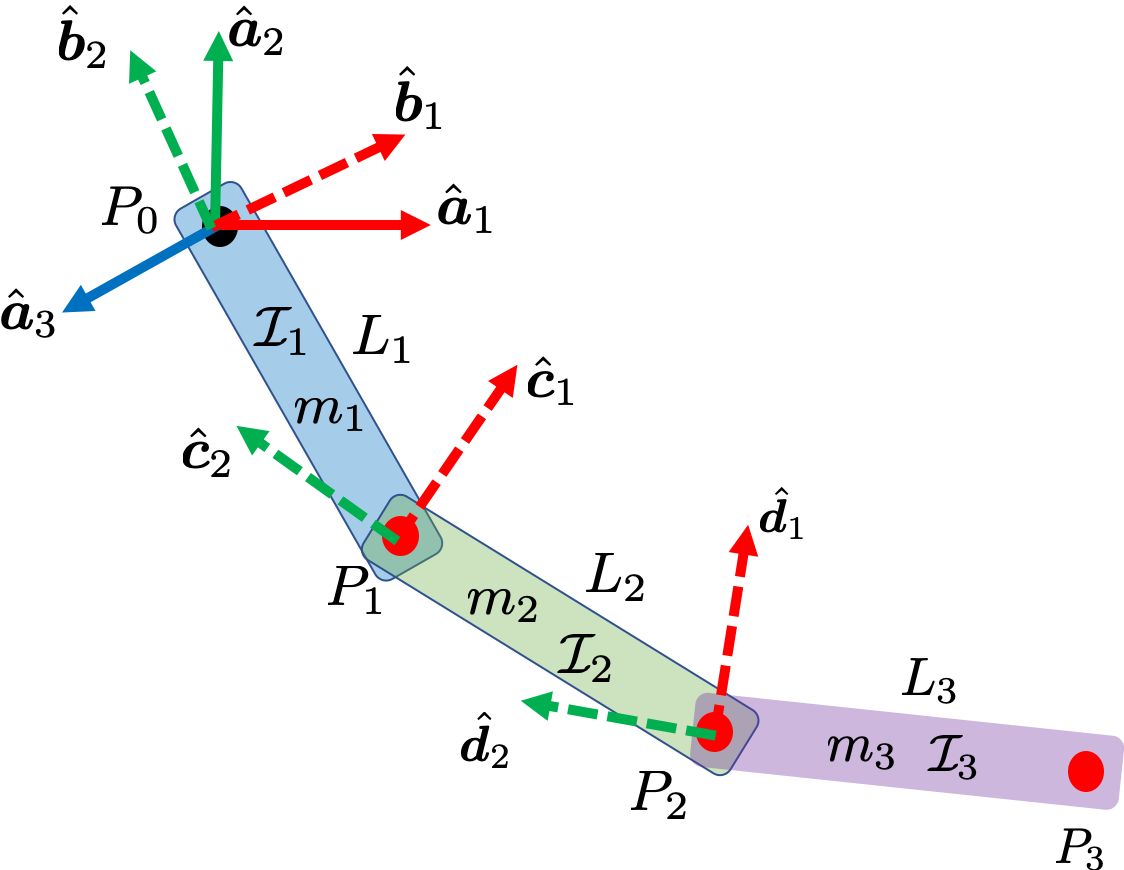
</div>
-->

## Double Pendulum

### Theory
Derive the dynamics of the double pendulum system shown in using: 
1. Newtons method
2. Euler-Lagrange method 

All links are uniform rectangles with dimensions width, height, length: $(w\times h \times L)=(a\times a \times L_i)$. 

### Simulate
1. Produce a dynamic function $\dot{s}(t) = f(s(t),p)$ where

    - The parameters of the system: $m_i, \mathcal{I}_i, L_i \,\,\forall i$, they will be in a parameter list $p = [p_1, \ldots, p_n]$ for $n$ links, where $p_i = [\underbrace{m_i}_{scalar}, \underbrace{L_i}_{scalar}, \underbrace{\mathcal{I}_i}_{\textit{matrix }3\times 3} ]$
    - For the state ${s} = \begin{bmatrix} \theta_{1} & \theta_{2} & \dot{\theta}_{1} & \dot{\theta}_{2}  \end{bmatrix}^T$ (where each $\theta_i$ is angle between the current frame and the $A$ frame), and you are given the current state ${s}(t)$ 

2. Simulate and Plot: plot your results, the states of the system (and if there was a control strategy the desired and actual trajectory of your system)


## Triple Pendulum

### Theory
Derive the dynamics of the triple pendulum system shown in Figure 2. All links are uniform rectangles with dimensions width, height, length: $(w\times h \times L)=(a\times a \times L_i)$.

### Simulate
1.  Produce a dynamic function $\dot{s}(t) = f(s(t),p)$ where
    - The parameters of the system: $m_i, \mathcal{I}_i, L_i \,\, \forall i$, they will be in a parameter list $p = [p_1, \ldots, p_n]$ for $n$ links, where $p_i = [\underbrace{m_i}_{scalar}, \underbrace{L_i}_{scalar}, \underbrace{\mathcal{I}_i}_{\textit{matrix }3\times 3} ]$
    - For the state ${s} = \begin{bmatrix} \theta_{1} & \theta_{2} & \theta_{3} & \dot{\theta}_{1} & \dot{\theta}_{2} & \dot{\theta}_{3} \end{bmatrix}^T$ (where each $\theta_i$ is angle between the current frame and the $A$ frame), given the current state ${s}(t)$ 

2. Simulate and Plot: plot your results, the states of the system (and if there was a control strategy the desired and actual trajectory of your system)


## Hints/tips
1. Please install the Tabulate package https://pypi.org/project/tabulate/
2. Feel free to add any additional functions you need to facilitate your solution
3. when submitting, if pdf does not generate automatically, leverage print-preview and scale for paper size. 


# Free Body Diagram (Newtonian)

## Double Pendulum

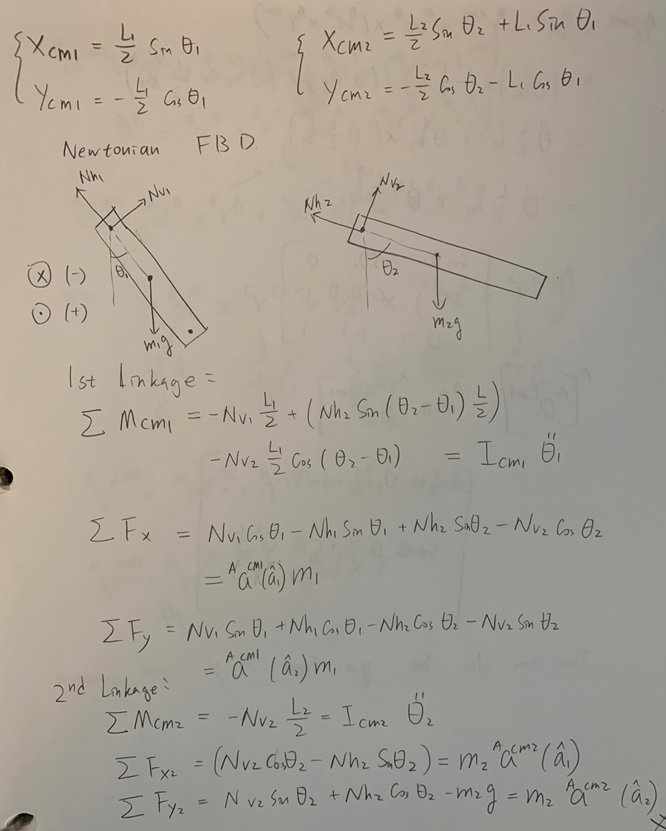

## We can have 6 equations from newtonian method, the unknown variables in the equations are Nv1, Nv2, Nh1, Nh2, th1, th2. We can eliminate Nv1, Nv2, Nh1, Nh2 to get EoM. However, I decided to use Lagrangian for deriving EoM, which is a more efficient way for deriving EoM (see the following python code). 

## Triple Pendulum

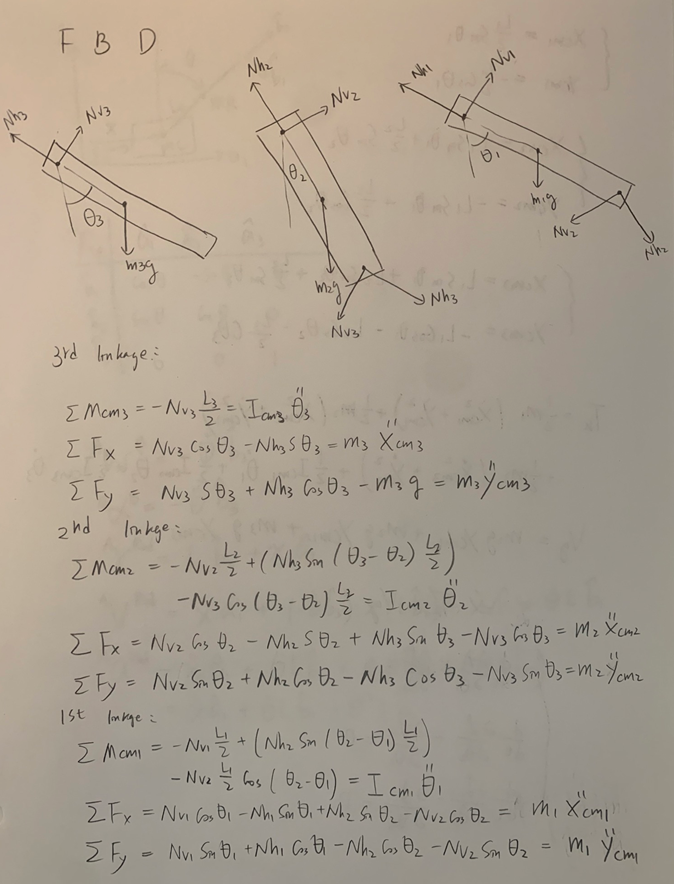

### We can know that triple pendulum dynamics is pretty similar to double pendulum.

## We can have 9 equations from newtonian method, the unknown variables in the equations are Nv1, Nv2, Nh1, Nh2, Nv3, Nh3, th1, th2, th3. We can eliminate Nv1, Nv2, Nh1, Nh2, Nv3, Nh3 to get EoM. However, I decided to use Lagrangian for deriving EoM, which is a more efficient way for deriving EoM (see the following python code). 

## Kinematics for doulbe pendulum

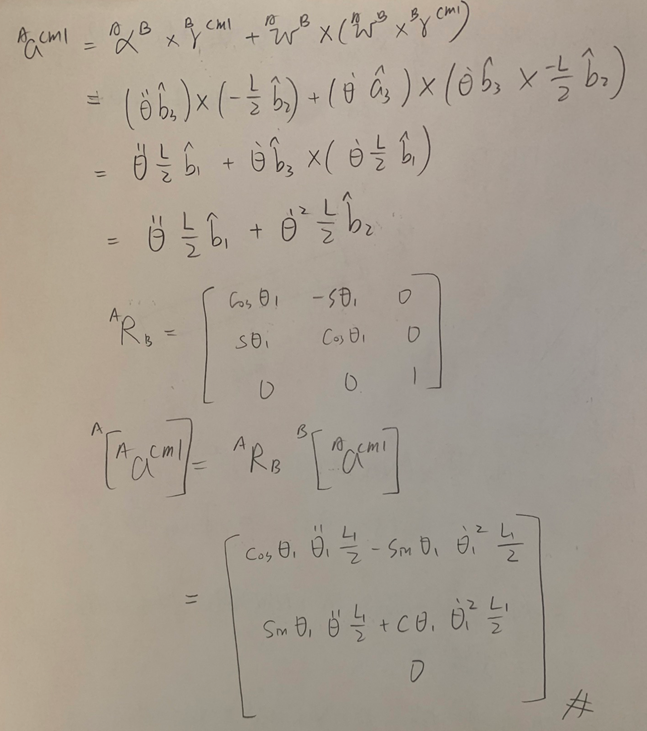

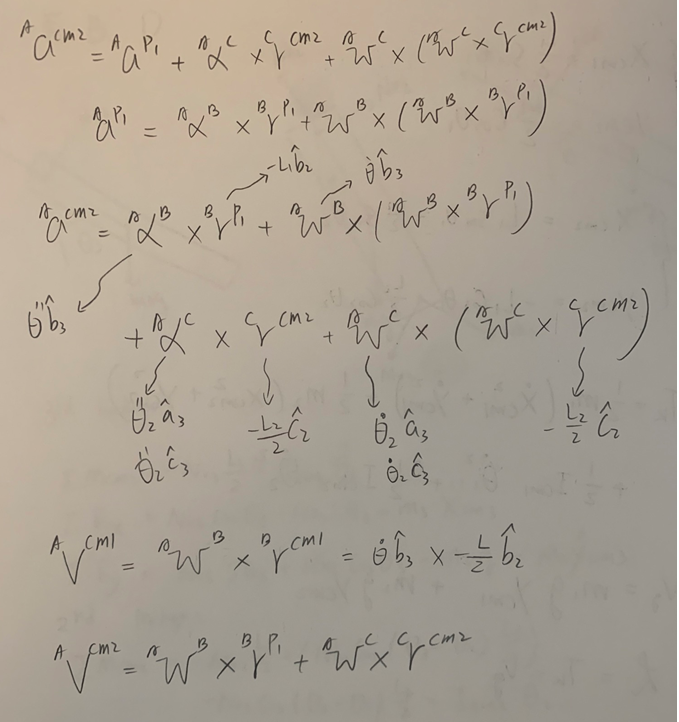

## The velocity and acceleration for both double and triple pendulum can be derived simply from center of mass location of all the linkages

## We can then use velocity for kinetic energy in order to derive EoM via Lagrangian

# Lagrangian

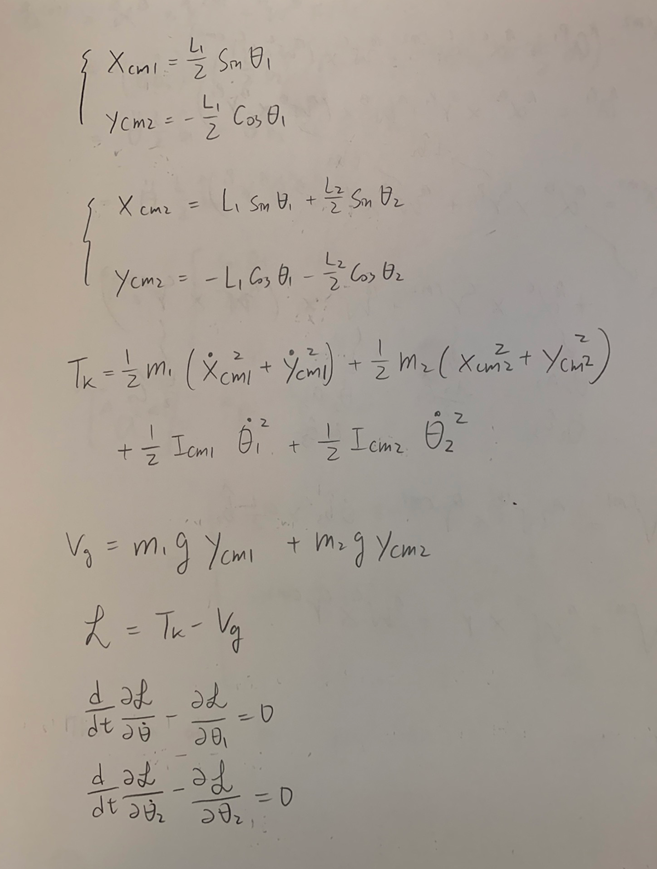

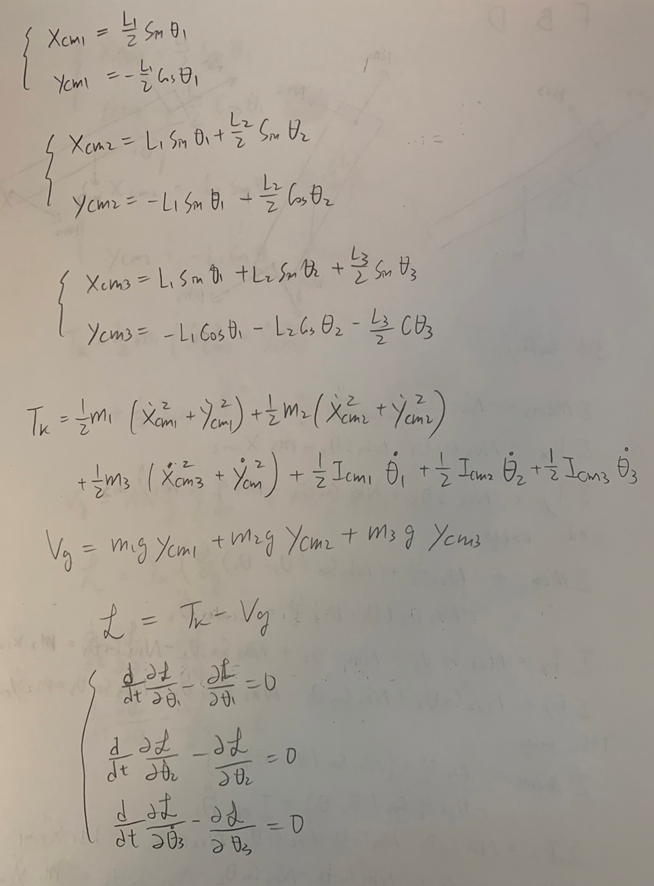

### I utlized python and python's solve functions to find EoM and for ddth1, ddth2, ddth3. Please check the following code for more details (compute_ddq & compute_ddq_tp functions). 

# Simulation (Double & Triple Pendumlum)

In [2]:
#!/usr/bin/env python
import numpy as np #import numpy as np means: import libary numpy and let me refer to it now on as 'np'
from scipy import integrate #this will allow us to perform integration (like matlab ode45)
#The following will allow us to plot and animate
import matplotlib.pyplot as plt  #This is used for static graphs
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
# import matplotlib.animation as animation 
from matplotlib import animation, rc #this will be used to play animations
#rc('text', usetex=True) #if you want to use latex in plot legends

import sympy as sp

#For displaying tables
from tabulate import tabulate

# Double Pendulum

In [3]:
#Set Parameters
def inertia_matrix_cm(L,W,H,m):
    '''
    Inertia matrix L on y axis, W on x axis and H on z axis
    m: mass (kg)
    Output: inertia matrix about the cm aligned with principle axis
    '''
    I = (m/12.0)*np.matrix([[L**2 + H**2,0,0],[0,W**2+H**2,0],[0,0,L**2+W**2]])
    return I

a1 = 0.1
L1 = 1.0
m1 = 3.0 #units kg
I1 = inertia_matrix_cm(L1,a1,a1,m1)

a2 = 0.1
L2 = 1.0
m2 = 2.0 #units kg
I2 = inertia_matrix_cm(L2,a2,a2,m2)

params_dp = {'link1':{'L':L1,'I':I1,'m':m1},
          'link2':{'L':L2,'I':I2,'m':m2}} #access example L1 = params['link1']['L']


## Functions below for the Double Pendulum:

## Dynamics EoM for double pendulum by applying Lagrangian

In [17]:
def compute_ddq():
    m1_sym = sp.symbols(r'm_1')
    m2_sym = sp.symbols(r'm_2')
    L1_sym = sp.symbols(r'L_1')
    L2_sym = sp.symbols(r'L_2')
    I1_sym = sp.symbols(r'I_1')
    I2_sym = sp.symbols(r'I_2')
    t_sym = sp.symbols('t')
    g_sym = sp.symbols('g')
    
    Fc1 = sp.symbols('F_1')
    Fc2 = sp.symbols('F_2')

    q1 = sp.Function(r'\theta_1')(t_sym) #theta1
    dq1 = sp.diff(q1,t_sym) #velocity
    ddq1 = sp.diff(dq1,t_sym) #acceleration

    q2 = sp.Function(r'\theta_2')(t_sym) #theta2
    dq2 = sp.diff(q2,t_sym) #velocity
    ddq2 = sp.diff(dq2,t_sym) #acceleration

    Xcm1 = (L1_sym/2)*sp.sin(q1)
    Ycm1 = -(L1_sym/2)*sp.cos(q1)
    Xcm2 = L1_sym*sp.sin(q1) + (L2_sym/2)*sp.sin(q2)
    Ycm2 = -L1_sym*sp.cos(q1) - (L2_sym/2)*sp.cos(q2)
    
    Tk = (1/2)*m1_sym*(sp.diff(Xcm1,t_sym)**2 \
        + sp.diff(Ycm1,t_sym)**2) \
        + (1/2)*m2_sym*(sp.diff(Xcm2,t_sym)**2 \
        + sp.diff(Ycm2,t_sym)**2) + (1/2)*I1_sym*dq1**2 + (1/2)*I2_sym*dq2**2

    Vg = m1_sym*g_sym*Ycm1 + m2_sym*g_sym*Ycm2

    Lag = Tk - Vg

    eq1 = sp.diff(sp.diff(Lag,sp.diff(q1,t_sym)),t_sym) - sp.diff(Lag,q1) - Fc1
    #print(sp.simplify(eq1))

    eq2 = sp.diff(sp.diff(Lag,sp.diff(q2,t_sym)),t_sym) - sp.diff(Lag,q2) - Fc2
    #print(sp.simplify(eq2))
    
    sols = sp.solve([eq1,eq2], (ddq1, ddq2), simplify=False)

    ddq1_func = sp.lambdify((m1_sym,m2_sym,L1_sym,L2_sym,I1_sym,I2_sym,g_sym,q1,q2,dq1,dq2,Fc1,Fc2), sols[ddq1]) 
    ddq2_func = sp.lambdify((m1_sym,m2_sym,L1_sym,L2_sym,I1_sym,I2_sym,g_sym,q1,q2,dq1,dq2,Fc1,Fc2), sols[ddq2]) 
    
    return (ddq1_func,ddq2_func)


In [21]:

m1_sym = sp.symbols(r'm_1')
m2_sym = sp.symbols(r'm_2')
L1_sym = sp.symbols(r'L_1')
L2_sym = sp.symbols(r'L_2')
I1_sym = sp.symbols(r'I_1')
I2_sym = sp.symbols(r'I_2')
t_sym = sp.symbols('t')
g_sym = sp.symbols('g')

q1 = sp.Function(r'\theta_1')(t_sym) #theta1
dq1 = sp.diff(q1,t_sym) #velocity
ddq1 = sp.diff(dq1,t_sym) #acceleration

q2 = sp.Function(r'\theta_2')(t_sym) #theta2
dq2 = sp.diff(q2,t_sym) #velocity
ddq2 = sp.diff(dq2,t_sym) #acceleration

Xcm1 = (L1_sym/2)*sp.sin(q1)
Ycm1 = -(L1_sym/2)*sp.cos(q1)
Xcm2 = L1_sym*sp.sin(q1) + (L2_sym/2)*sp.sin(q2)
Ycm2 = -L1_sym*sp.cos(q1) - (L2_sym/2)*sp.cos(q2)

Tk = (1/2)*m1_sym*(sp.diff(Xcm1,t_sym)**2 \
    + sp.diff(Ycm1,t_sym)**2) \
    + (1/2)*m2_sym*(sp.diff(Xcm2,t_sym)**2 \
    + sp.diff(Ycm2,t_sym)**2) + (1/2)*I1_sym*dq1**2 + (1/2)*I2_sym*dq2**2

Vg = m1_sym*g_sym*Ycm1 + m2_sym*g_sym*Ycm2

Lag = Tk - Vg

eq1 = sp.diff(sp.diff(Lag,sp.diff(q1,t_sym)),t_sym) - sp.diff(Lag,q1)
print(sp.simplify(eq1))

eq2 = sp.diff(sp.diff(Lag,sp.diff(q2,t_sym)),t_sym) - sp.diff(Lag,q2)
print(sp.simplify(eq2))


1.0*I_1*Derivative(\theta_1(t), (t, 2)) + 0.25*L_1**2*m_1*Derivative(\theta_1(t), (t, 2)) + 1.0*L_1**2*m_2*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*L_1*L_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 0.5*L_1*g*m_1*sin(\theta_1(t)) + 1.0*L_1*g*m_2*sin(\theta_1(t))
1.0*I_2*Derivative(\theta_2(t), (t, 2)) - 0.5*L_1*L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 0.5*L_1*L_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + 0.25*L_2**2*m_2*Derivative(\theta_2(t), (t, 2)) + 0.5*L_2*g*m_2*sin(\theta_2(t))


In [18]:
# get the lambdify functions for ddq1 and ddq2
ddq1_func,ddq2_func = compute_ddq()

# Double_Pendulums w. Controller

In [190]:

def double_pendulum_dyn(s,t,params):
    '''
    Input:
    - s: states of the system in numpy matrix (4x1 vector) [th1, th2, dth1, dth2]
    - params: dictionary of parameter values
    ------
    Output:
    - ds/dt: derivative states vector (4x1 vector) [dth1, dth2, ddth1, ddth2]
    '''
    I1 = params['link1']['I']
    I2 = params['link2']['I']
    L1 = params['link1']['L']
    L2 = params['link2']['L']
    
    m1 = params['link1']['m']
    m2 = params['link2']['m']
    
    g = 9.81
    
    th1 = s[0]
    th2 = s[1]
    dth1 = s[2]
    dth2 = s[3]
    
    des_th1 = 0 # pointing down
    des_dth1 = 0 
    des_th2 = 0 # pointing down
    des_dth2 = 0
    
    e_th1 = th1 - des_th1
    e_dth1 = dth1 - des_dth1
    
    e_th2 = th2 - des_th2
    e_dth2 = dth2 - des_dth2
    
    u1 = - 1 * e_th1 - 50 * e_dth1
    u2 = -1 * e_th2 - 50 * e_dth2
            
    ds= [dth1,dth2,ddq1_func(m1,m2,L1,L2,I1[2,2],I2[2,2],g,th1,th2,dth1,dth2, u1,u2),ddq2_func(m1,m2,L1,L2,I1[2,2],I2[2,2],g,th1,th2,dth1,dth2, u1,u2)]
    
    return ds

## Report the valus of $\dot{s}$ (Required for grading)

In [191]:
double_pendulum_dyn([np.sqrt(2),np.sqrt(3),np.sqrt(5),np.sqrt(7)],0,params_dp) # The simulation is in the following

[2.23606797749979, 2.6457513110645907, 37.23285790889184, -270.27367701574747]

## Calculate Dynamics

In [192]:
#now make the time series
max_time = 30
Sec_sub = 20 #second subdivision (frequency/Hz)
dt = 1/Sec_sub #useful for the animation function
t = np.linspace(0,max_time,int(Sec_sub*max_time))

# initial conditions
s2_init_list = [[0,0,0.6,0.8],
                [0,0,-0.6,-0.8],
                [np.pi/2,0,0,0],
                [np.pi/2,np.pi/2,0,0],
                [np.pi,np.pi/2,0,0],
                [np.pi/2,np.pi/2,1.6,-0.3],
                [np.sqrt(2),np.sqrt(3),np.sqrt(5),np.sqrt(7)]] # THIS WILL BE USED FOR REPORTING THE REQUIRED VALUES OF ds

#integrate dynamics output
s2_t_list = []
for s2_0 in s2_init_list:
    s2_t_out = integrate.odeint(double_pendulum_dyn,s2_0,t, args=(params_dp,))
    s2_t_list.append(s2_t_out)


In [193]:
def dp_subfig_plots(ax_curr,s2_curr,t):
    ax_curr.grid()
    ax_curr.plot(t,s2_curr[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s2_curr[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s2_curr[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s2_curr[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.legend(fontsize='5'); #show the legend

## Plot the results for all 7 ICs (Required for grading)

<IPython.core.display.Javascript object>


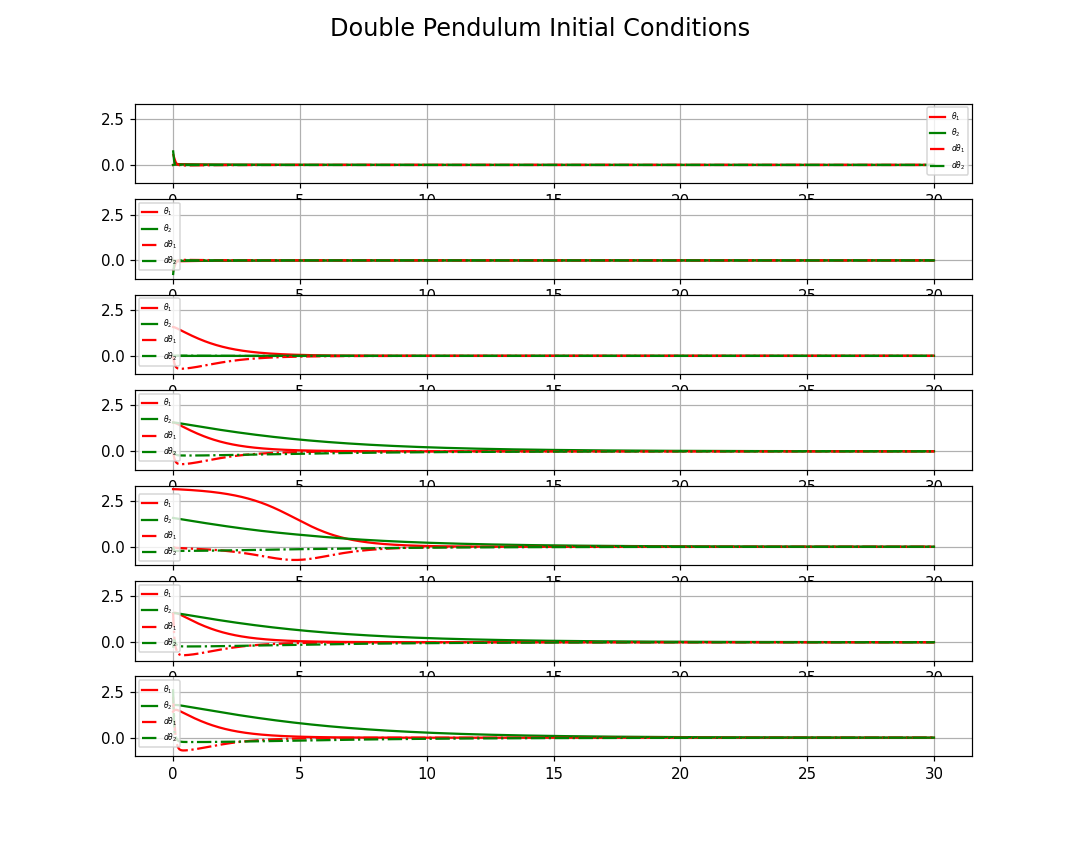

    IC 1      IC 2           IC 3       IC 4       IC 5      IC 6        IC 7
--------  --------  -------------  ---------  ---------  --------  ----------
  0.6      -0.6       0              0          0          1.6        2.23607
  0.8      -0.8       0              0          0         -0.3        2.64575
 19.8178  -19.8178  -11.9586       -12.5326    -1.04633  -80.5456    37.2329
-89.5029   89.5029    1.09564e-15    1.72346  -17.0286   125.932   -270.274


In [195]:
figdp, axdp = plt.subplots(7,1,figsize=(10, 8),sharey=True)
figdp.suptitle('Double Pendulum Initial Conditions',fontsize=16)

for idx in range(7):
    ax_curr = axdp[idx]
    s2_curr = s2_t_list[idx]
    dp_subfig_plots(ax_curr,s2_curr,t)

#This is a grading tool, each column is the differential ds/dt for these intial conditions      
ds_dp_list = []
for ss_test in s2_init_list:
    ds_test = double_pendulum_dyn(ss_test,0.0,params_dp)
    ds_dp_list.append(ds_test)
#rows have ds_dt for each initial condition, these need to be transposed to columns
ds_dp_list = np.array(ds_dp_list).T.tolist()
columns = ['IC 1','IC 2','IC 3','IC 4','IC 5','IC 6','IC 7'] #initial condition indicies
   

plt.show() #this says display the info here
print(tabulate(ds_dp_list,headers=columns))

## IC: [0,0,0.6,0.8]

<IPython.core.display.Javascript object>


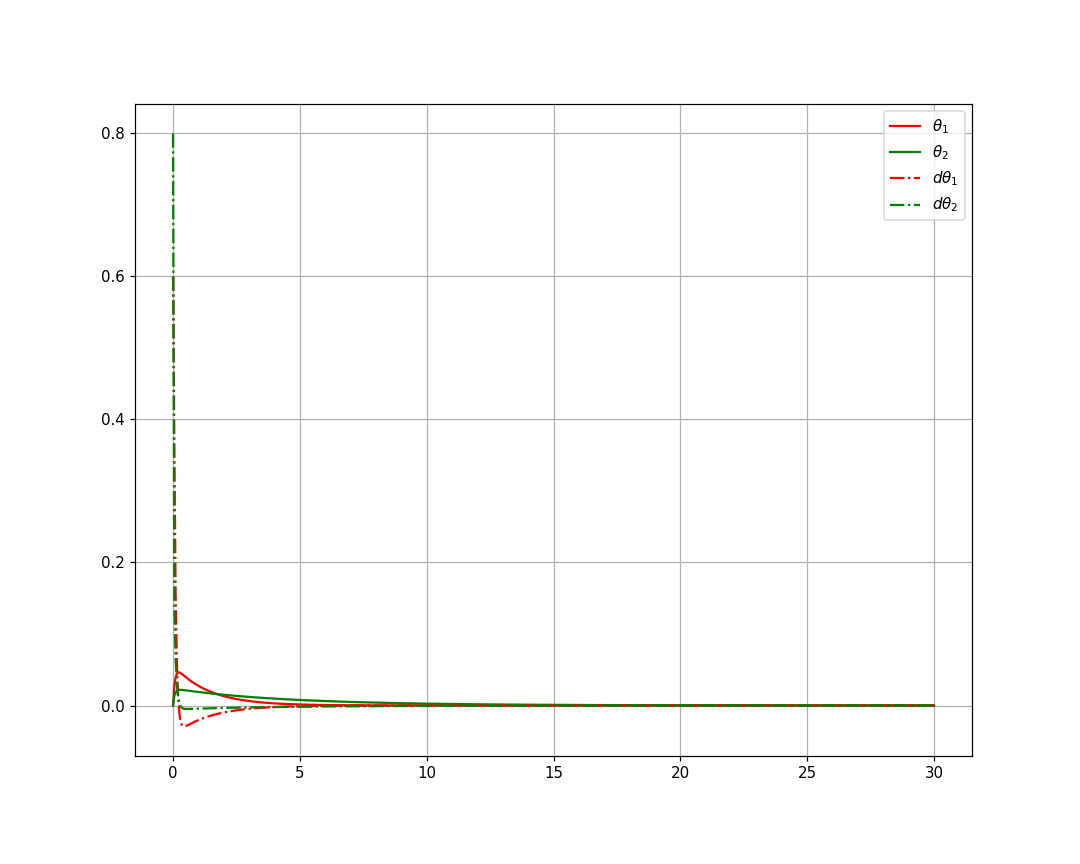

In [196]:
s2_t = s2_t_list[0]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [0,0,-0.6,-0.8]

<IPython.core.display.Javascript object>


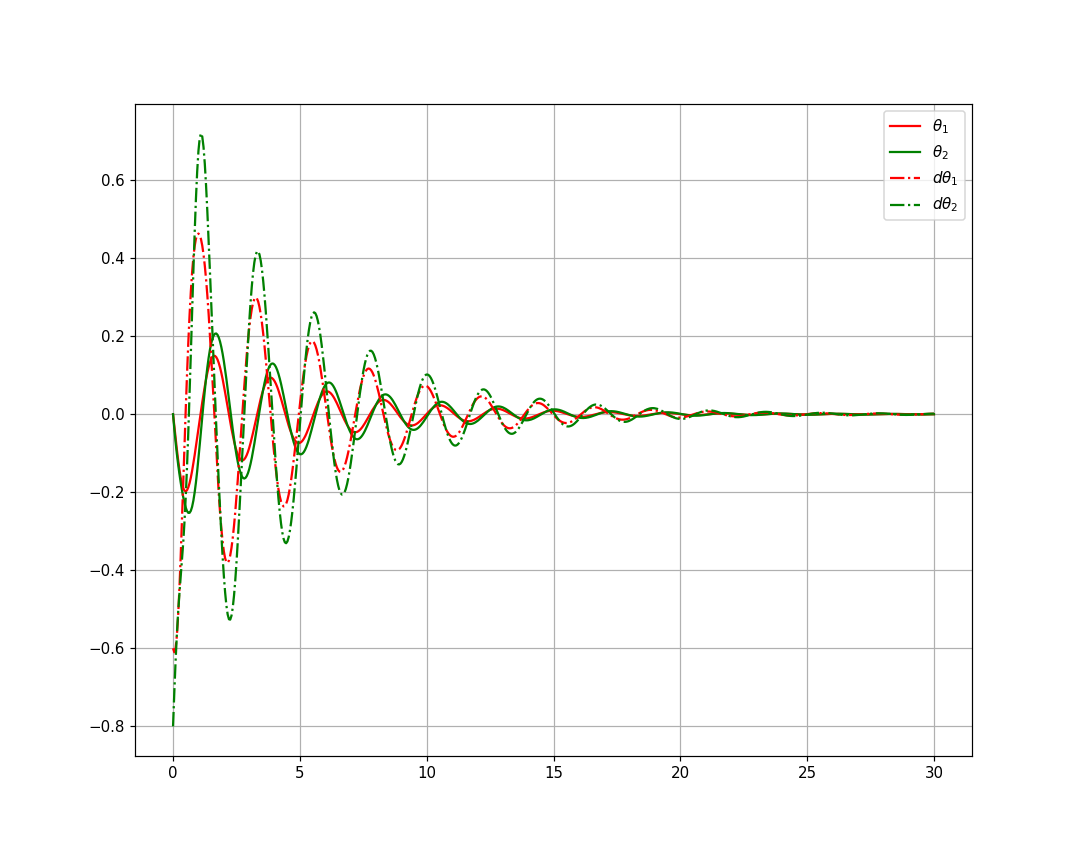

In [182]:
s2_t = s2_t_list[1]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [np.pi/2,0,0,0]

<IPython.core.display.Javascript object>


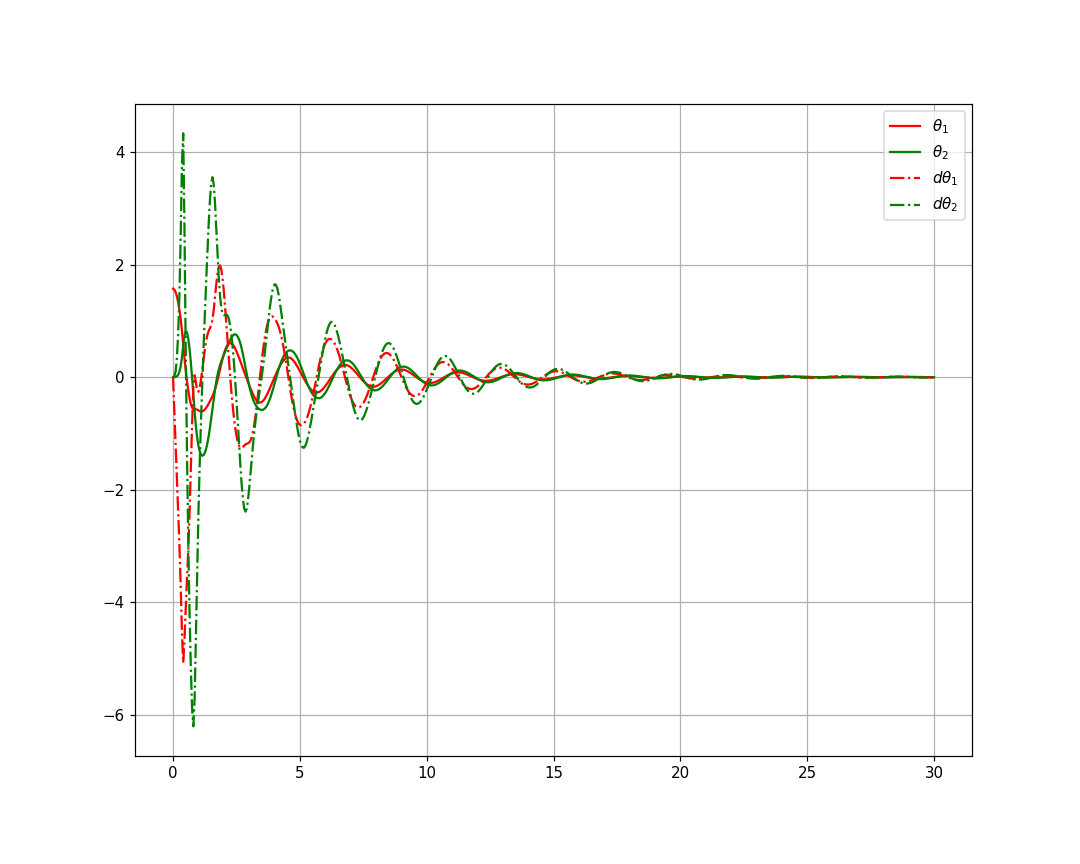

In [183]:
s2_t = s2_t_list[2]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [np.pi/2,np.pi/2,0,0]

<IPython.core.display.Javascript object>


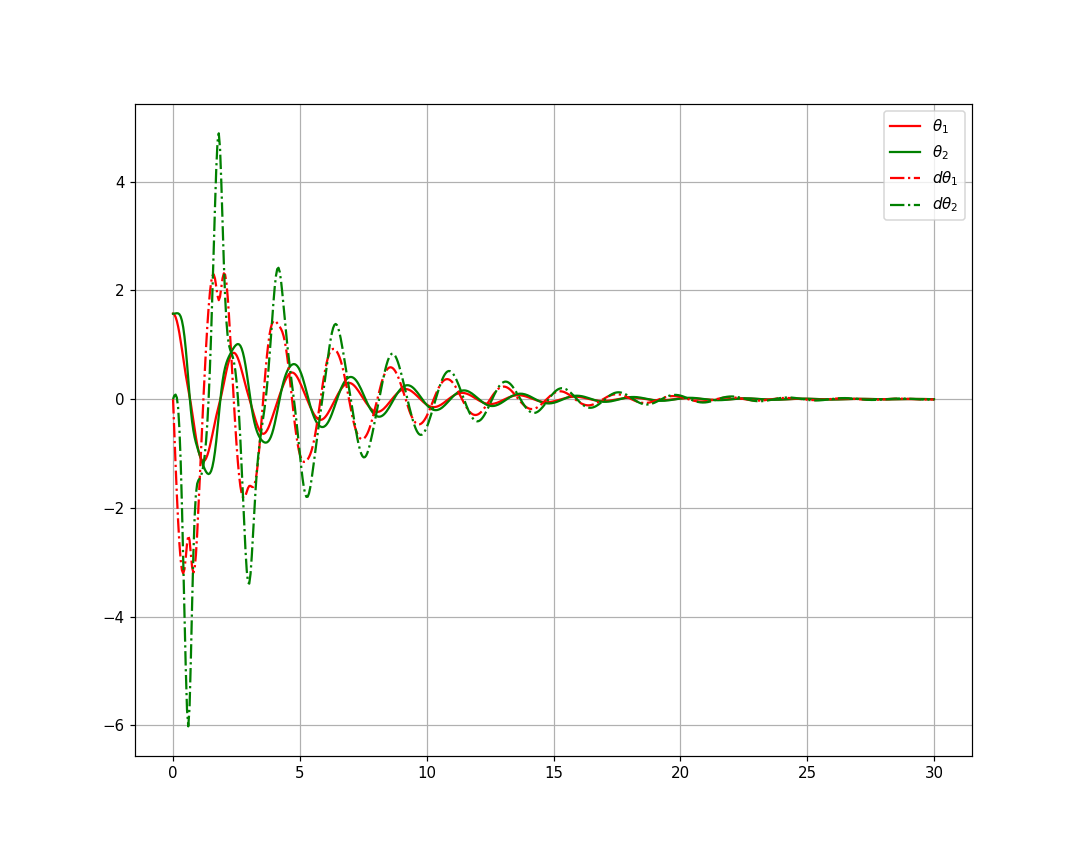

In [184]:
s2_t = s2_t_list[3]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [np.pi,np.pi/2,0,0]

<IPython.core.display.Javascript object>


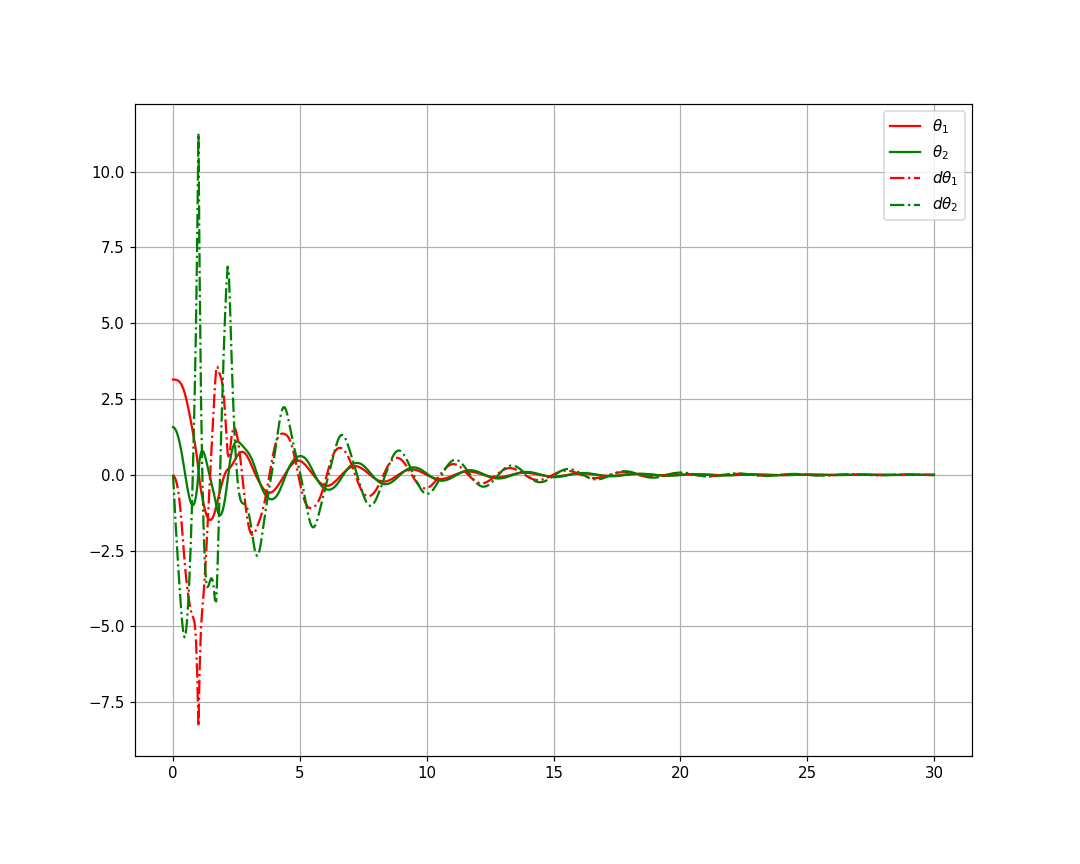

In [185]:
s2_t = s2_t_list[4]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [np.pi/2,np.pi/2,1.6,-0.3]

<IPython.core.display.Javascript object>


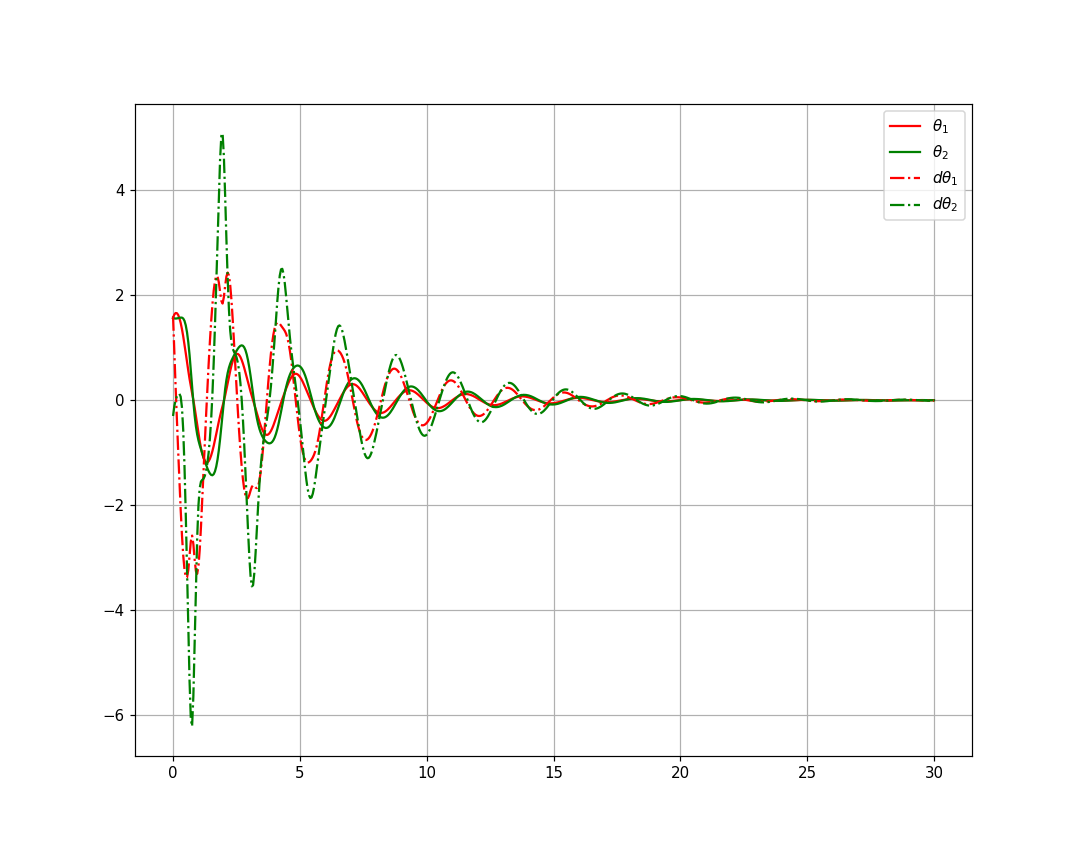

In [186]:
s2_t = s2_t_list[5]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

## IC: [$\sqrt2$,$\sqrt3$,$\sqrt5$,$\sqrt7$]

<IPython.core.display.Javascript object>


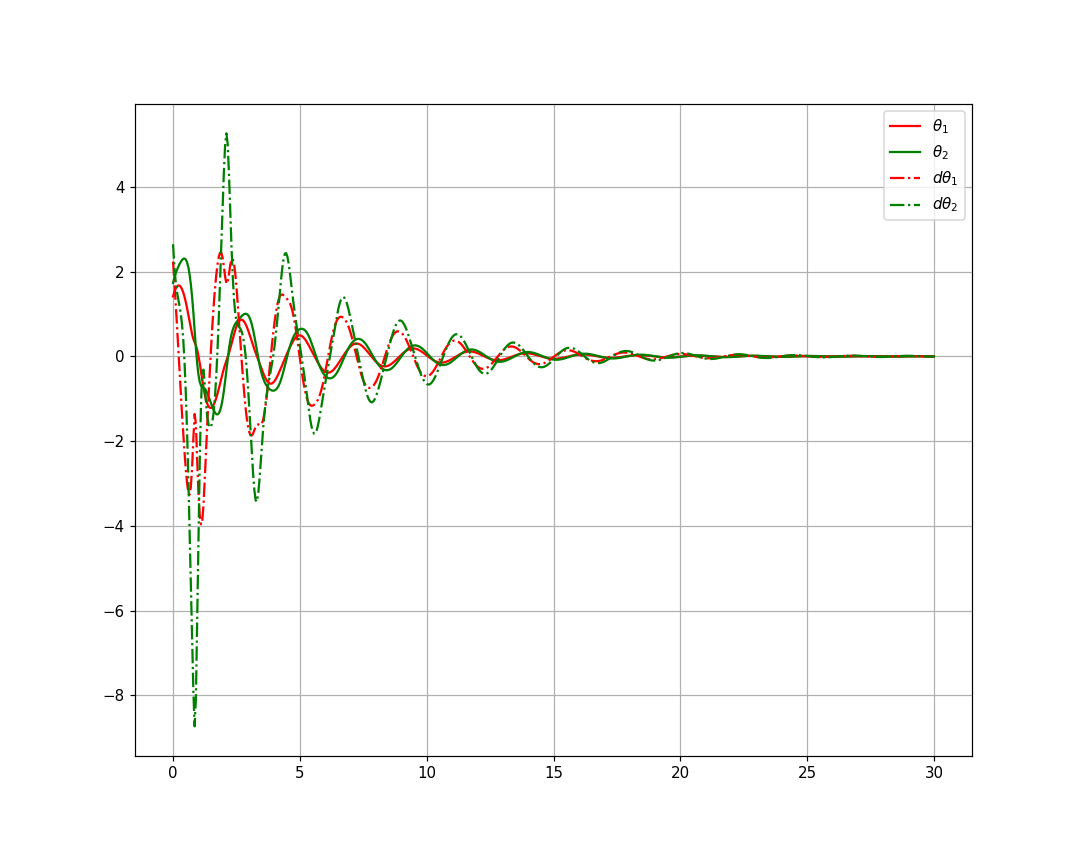

In [187]:
s2_t = s2_t_list[6]
#Now plot the angle vs time
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend(); #show the legend

# Run the animation:

<IPython.core.display.Javascript object>


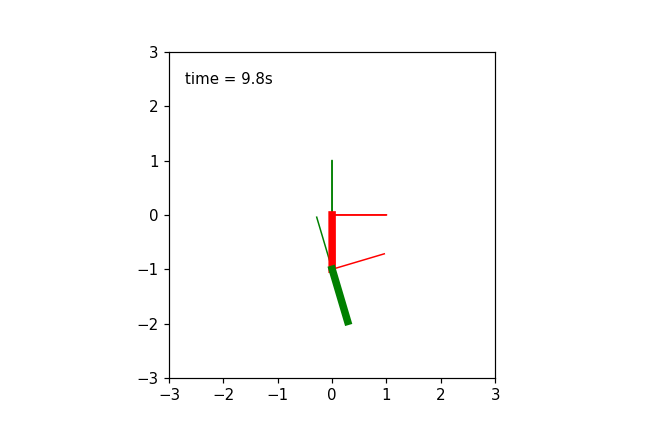

In [197]:
s2_t = s2_t_list[6] # when the pendulum starts at the top

#Simulate Output
%matplotlib notebook
from matplotlib import animation, rc #this will be used to play animations
#rc('text', usetex=True) #if you want to use latex in plot legends
from IPython.display import HTML #this is for rendering the animations

#Draw the objects
fig2 = plt.figure();
ax2 = fig2.add_subplot(111, autoscale_on=False, xlim=(-3.0, 3), ylim=(-3.0, 3.0));
ax2.set_aspect('equal')

frame_lengths = 1.0

#frames
frame_A_x, = ax2.plot([0,frame_lengths], [0,0], '-',color='red', lw=1)
frame_A_y, = ax2.plot([0,0], [0,frame_lengths], '-',color='green', lw=1)

frame_B_x, = ax2.plot([], [], '-',color='red', lw=1)
frame_B_y, = ax2.plot([], [], '-',color='green', lw=1)

frame_C_x, = ax2.plot([], [], '-',color='red', lw=1)
frame_C_y, = ax2.plot([], [], '-',color='green', lw=1)



#define animation structions
link1, = ax2.plot([], [], '-',color='red', lw=5)
link2, = ax2.plot([], [], '-',color='green', lw=5)
time_template = 'time = %.1fs';
time_text = ax2.text(0.05, 0.9, '', transform=ax2.transAxes); #sim time object, with location description

def rot_z_axis(th):
    R = np.matrix([[np.cos(th), -np.sin(th),0],
                   [np.sin(th), np.cos(th),0],
                   [0,0,1]])
    #this rotates a frame from F back to A through angle th on the z-axis
    return R

def draw_frames(origin, z_axis_rotation_angle):
    #leveraging the fact that all axis undergo rotation about the z axis
    y_local = np.matrix([0,1,0]).T
    x_local = np.matrix([1,0,0]).T
    th = z_axis_rotation_angle
    R = rot_z_axis(th)
    y_rot = R*y_local
    x_rot = R*x_local
    y_rot_vect = [[origin.item(0),origin.item(0)+y_rot.item(0)],
                  [origin.item(1),origin.item(1)+y_rot.item(1)]]
    
    x_rot_vect = [[origin.item(0),origin.item(0)+x_rot.item(0)],
                  [origin.item(1),origin.item(1)+x_rot.item(1)]]
    
    return x_rot_vect,y_rot_vect

def pendulum_link_ani(p_init, p_final):
    link_x = [p_init.item(0),p_final.item(0)]
    link_y = [p_init.item(1),p_final.item(1)]
    return link_x, link_y

def update_pendulum(i,link1,link2,params_dp):
    th1,th2,dth1,dth2 = s2_t[i,:]
    
    P0 = np.matrix([0,0,0]).T
    
    R_BA = rot_z_axis(th1)
    L1 = params_dp['link1']['L']
    P1_local = np.matrix([0,-L1,0]).T
    P1 = R_BA*P1_local
    
    R_CA = rot_z_axis(th2)
    L2 = params_dp['link2']['L']
    P2_local = np.matrix([0,-L2,0]).T
    P2 = R_CA*P2_local + P1
    
    #obtain reference frame vectors
    B_x_vec,B_y_vec = draw_frames(P0,th1)
    C_x_vec,C_y_vec = draw_frames(P1,th2)
    
    #Now update the frames
    frame_A_x.set_data([0,frame_lengths], [0,0])
    frame_A_y.set_data([0,0], [0,frame_lengths])
    frame_B_x.set_data(B_x_vec[0],B_x_vec[1])
    frame_B_y.set_data(B_y_vec[0],B_y_vec[1])
    frame_C_x.set_data(C_x_vec[0],C_x_vec[1])
    frame_C_y.set_data(C_y_vec[0],C_y_vec[1])
    
    #Now draw the pendulum
    link1.set_data(pendulum_link_ani(P0,P1))
    link2.set_data(pendulum_link_ani(P1,P2))
    
    time_text.set_text(time_template % (i*dt))
    return [link1, link2],time_text

dp_ani = animation.FuncAnimation(fig2, update_pendulum, np.arange(1, len(t)) , fargs=(link1, link2,params_dp),
                                   interval=50, blit=False)


plt.show()

# Triple Pendulum

In [3]:
def inertia_matrix_cm(L,W,H,m):
    '''
    Inertia matrix L on y axis, W on x axis and H on z axis
    m: mass (kg)
    Output: inertia matrix about the cm aligned with principle axis
    '''
    I = (m/12.0)*np.matrix([[L**2 + H**2,0,0],[0,W**2+H**2,0],[0,0,L**2+W**2]])
    return I
#Set Parameters
a1 = 0.1
L1 = 1.3
m1 = 3.0 #units kg
I1 = inertia_matrix_cm(L1,a1,a1,m1)

a2 = 0.1
L2 = 0.9
m2 = 3.0 #units kg
I2 = inertia_matrix_cm(L2,a2,a2,m2)

a3 = 0.1
L3 = 0.8
m3 = 3.0 #units kg
I3 = inertia_matrix_cm(L3,a3,a3,m3)


params_tp = {'link1':{'L':L1,'I':I1,'m':m1},
             'link2':{'L':L2,'I':I2,'m':m2},
             'link3':{'L':L3,'I':I3,'m':m3}} #access example L1 = params['link1']['L']


## Triple Pendulum Dynamics EoM by applying Lagrangian:

In [4]:
def compute_ddq_tp(params_tp):
    
    I1 = params_tp['link1']['I'][2,2]
    I2 = params_tp['link2']['I'][2,2]
    I3 = params_tp['link3']['I'][2,2]
    L1 = params_tp['link1']['L']
    L2 = params_tp['link2']['L']
    L3 = params_tp['link3']['L']
    
    m1 = params_tp['link1']['m']
    m2 = params_tp['link2']['m']
    m3 = params_tp['link3']['m']
    
    t_sym = sp.symbols('t')
    g = 9.81

    q1 = sp.Function(r'\theta_1')(t_sym) #theta1
    dq1 = sp.diff(q1,t_sym) #velocity
    ddq1 = sp.diff(dq1,t_sym) #acceleration

    q2 = sp.Function(r'\theta_2')(t_sym) #theta2
    dq2 = sp.diff(q2,t_sym) #velocity
    ddq2 = sp.diff(dq2,t_sym) #acceleration
    
    q3 = sp.Function(r'\theta_3')(t_sym) #theta3
    dq3 = sp.diff(q3,t_sym) #velocity
    ddq3 = sp.diff(dq3,t_sym) #acceleration    

    Xcm1 = (L1/2)*sp.sin(q1)
    Ycm1 = -(L1/2)*sp.cos(q1)
    Xcm2 = L1*sp.sin(q1) + (L2/2)*sp.sin(q2)
    Ycm2 = -L1*sp.cos(q1) - (L2/2)*sp.cos(q2)
    Xcm3 = L1*sp.sin(q1) + L2*sp.sin(q2) + (L3/2)*sp.sin(q3)
    Ycm3 = -L1*sp.cos(q1) -L2*sp.cos(q2) - (L3/2)*sp.cos(q3)

    Tk = (1/2)*m1*(sp.diff(Xcm1,t_sym)**2 + sp.diff(Ycm1,t_sym)**2) \
        + (1/2)*m2*(sp.diff(Xcm2,t_sym)**2 + sp.diff(Ycm2,t_sym)**2) \
        + (1/2)*m3*(sp.diff(Xcm3,t_sym)**2 + sp.diff(Ycm3,t_sym)**2) \
        + (1/2)*I1*dq1**2 + (1/2)*I2*dq2**2 + (1/2)*I3*dq3**2

    Vg = m1*g*Ycm1 + m2*g*Ycm2 + m3*g*Ycm3

    Lag = Tk - Vg

    eq1 = sp.diff(sp.diff(Lag,sp.diff(q1,t_sym)),t_sym) - sp.diff(Lag,q1)

    eq2 = sp.diff(sp.diff(Lag,sp.diff(q2,t_sym)),t_sym) - sp.diff(Lag,q2)

    eq3 = sp.diff(sp.diff(Lag,sp.diff(q3,t_sym)),t_sym) - sp.diff(Lag,q3)
    
    eq1 = sp.Eq( eq1, 0.0 )
    eq2 = sp.Eq( eq2, 0.0 )
    eq3 = sp.Eq( eq3, 0.0 )
    
    q1_sym, dq1_sym, ddq1_sym, q2_sym, dq2_sym, ddq2_sym, q3_sym, dq3_sym, ddq3_sym = sp.symbols('q1 dq1 ddq1 q2 dq2 ddq2 q3 dq3 ddq3')
    
    eq1_sym = eq1.subs({q1: q1_sym, dq1: dq1_sym, ddq1: ddq1_sym, q2: q2_sym, dq2: dq2_sym, ddq2: ddq2_sym, q3: q3_sym, dq3: dq3_sym, ddq3: ddq3_sym })
    eq2_sym = eq2.subs({q1: q1_sym, dq1: dq1_sym, ddq1: ddq1_sym, q2: q2_sym, dq2: dq2_sym, ddq2: ddq2_sym, q3: q3_sym, dq3: dq3_sym, ddq3: ddq3_sym })
    eq3_sym = eq3.subs({q1: q1_sym, dq1: dq1_sym, ddq1: ddq1_sym, q2: q2_sym, dq2: dq2_sym, ddq2: ddq2_sym, q3: q3_sym, dq3: dq3_sym, ddq3: ddq3_sym })
    
    sols = sp.solve([eq1_sym,eq2_sym,eq3_sym], (ddq1_sym, ddq2_sym, ddq3_sym), simplify=False, rational=None)


    ddq1_func = sp.lambdify((q1_sym, dq1_sym, q2_sym, dq2_sym, q3_sym, dq3_sym), sols[ddq1_sym]) 
    ddq2_func = sp.lambdify((q1_sym, dq1_sym, q2_sym, dq2_sym, q3_sym, dq3_sym), sols[ddq2_sym]) 
    ddq3_func = sp.lambdify((q1_sym, dq1_sym, q2_sym, dq2_sym, q3_sym, dq3_sym), sols[ddq3_sym])     
    
    return (ddq1_func,ddq2_func,ddq3_func)


In [5]:
# get lambdify functions for ddq
ddq1_func,ddq2_func,ddq3_func = compute_ddq_tp(params_tp)

In [6]:
#Student Functions (please construct any additional functions you need in this block)
def triple_pendulum_dyn(s,t,params):
    '''
    Input:
    - s: states of the system in numpy matrix (6x1 vector) [th1, th2, th3, dth1, dth2, dth3]
    - params: dictionary of parameter values
    ------
    Output:
    - ds/dt: derivative states vector (6x1 vector) [dth1, dth2, dth3, ddth1, ddth2, ddth3]
    '''
    
    th1 = s[0]
    th2 = s[1]
    th3 = s[2]
    dth1 = s[3]
    dth2 = s[4]
    dth3 = s[5]
            
    ds= [dth1,dth2,dth3,ddq1_func(th1,dth1,th2,dth2,th3,dth3),
         ddq2_func(th1,dth1,th2,dth2,th3,dth3),
         ddq3_func(th1,dth1,th2,dth2,th3,dth3)]
    
    return ds

## Report the valus of $\dot{s}$ (Required for grading)

In [29]:
triple_pendulum_dyn([np.sqrt(2),np.sqrt(3),np.sqrt(5),np.sqrt(7),np.sqrt(11),np.sqrt(13)],0,params_tp) # The simulation is in the following

[2.6457513110645907,
 3.3166247903554,
 3.605551275463989,
 -1.2842814112276209,
 -3.073475561905847,
 -29.145911417740702]

## Calculate Dynamics

In [30]:
#now make the time series
max_time = 30
Sec_sub = 20 #second subdivision (frequency/Hz)
dt = 1/Sec_sub #useful for the animation function
t = np.linspace(0,max_time,int(Sec_sub*max_time))

s3_init_list = [[0,0,0,0.6,0.8,0.4],
                [0,0,0,-0.6,-0.8,0.5],
                [np.pi/2,0,0,0,0,0],
                [np.pi/2,np.pi/2,0,0,0,0],
                [np.pi,np.pi/2,0,0,0,0],
                [np.pi/2,np.pi/2,np.pi/3,1.6,-0.3,0.4],
                [np.sqrt(2),np.sqrt(3),np.sqrt(5),np.sqrt(7),np.sqrt(11),np.sqrt(13)]]

#integrate dynamics output
s3_t_list = []
for s3_0 in s3_init_list:
    print(s3_0)
    s3_t_out = integrate.odeint(triple_pendulum_dyn,s3_0,t, args=(params_tp,))
    s3_t_list.append(s3_t_out)


[0, 0, 0, 0.6, 0.8, 0.4]
[0, 0, 0, -0.6, -0.8, 0.5]
[1.5707963267948966, 0, 0, 0, 0, 0]
[1.5707963267948966, 1.5707963267948966, 0, 0, 0, 0]
[3.141592653589793, 1.5707963267948966, 0, 0, 0, 0]
[1.5707963267948966, 1.5707963267948966, 1.0471975511965976, 1.6, -0.3, 0.4]
[1.4142135623730951, 1.7320508075688772, 2.23606797749979, 2.6457513110645907, 3.3166247903554, 3.605551275463989]


In [11]:
def tp_subfig_plots(ax_curr,s3_curr,t):
    ax_curr.grid()
    ax_curr.plot(t,s3_curr[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s3_curr[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s3_curr[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s3_curr[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s3_curr[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.plot(t,s3_curr[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables
    ax_curr.legend(fontsize='5'); #show the legend

## Plot the results for all 6 ICs (Required for grading)
### Simulation Results for Sec_sub = 20 & 10
## 0.05s, Sec_sub = 20

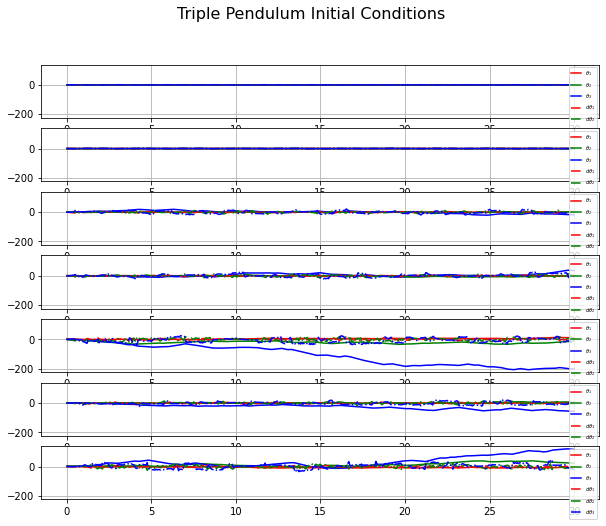

  IC 1    IC 2          IC 3          IC 4           IC 5      IC 6       IC 7
------  ------  ------------  ------------  -------------  --------  ---------
   0.6    -0.6   0             0              0             1.6        2.64575
   0.8    -0.8   0             0              0            -0.3        3.31662
   0.4     0.5   0             0              0             0.4        3.60555
   0       0    -8.08346      -9.48241       -7.20437e-16  -9.23274   -1.28428
   0       0     9.16603e-16   3.14399      -12.253         1.32855   -3.07348
   0       0    -3.38956e-16   1.08618e-15   -4.88057e-16   4.79592  -29.1459


In [32]:
figtp, axtp = plt.subplots(7,1,figsize=(10, 8),sharey=True)
figtp.suptitle('Triple Pendulum Initial Conditions',fontsize=16)

for idx in range(7):
    ax_curr = axtp[idx]
    s3_curr = s3_t_list[idx]
    tp_subfig_plots(ax_curr,s3_curr,t)


#This is a grading tool, each column is the differential ds/dt for these intial conditions      
ds_tp_list = []
for ss_test in s3_init_list:
    ds_test = triple_pendulum_dyn(ss_test,0.0,params_tp)
    ds_tp_list.append(ds_test)
#rows have ds_dt for each initial condition, these need to be transposed to columns
ds_tp_list = np.array(ds_tp_list).T.tolist()
columns = ['IC 1','IC 2','IC 3','IC 4','IC 5','IC 6','IC 7'] #initial condition indicies
       


plt.show() #this says display the info here
#This is a grading tool, each column is the differential ds/dt for these intial conditions       
print(tabulate(ds_tp_list,headers=columns))

## 0.1s, Sec_sub = 10 (This might cause lower accuracy)

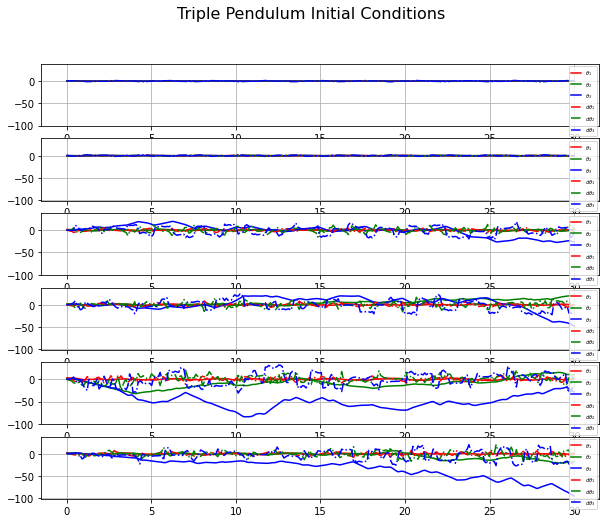

  IC 1    IC 2          IC 3          IC 4           IC 5      IC 6
------  ------  ------------  ------------  -------------  --------
   0.6    -0.6   0             0              0             1.6
   0.8    -0.8   0             0              0            -0.3
   0.4     0.5   0             0              0             0.4
   0       0    -8.08346      -9.48241       -7.20437e-16  -9.23274
   0       0     9.16603e-16   3.14399      -12.253         1.32855
   0       0    -3.38956e-16   1.08618e-15   -4.88057e-16   4.79592


In [16]:
figtp, axtp = plt.subplots(6,1,figsize=(10, 8),sharey=True)
figtp.suptitle('Triple Pendulum Initial Conditions',fontsize=16)

for idx in range(6):
    ax_curr = axtp[idx]
    s3_curr = s3_t_list[idx]
    tp_subfig_plots(ax_curr,s3_curr,t)


#This is a grading tool, each column is the differential ds/dt for these intial conditions      
ds_tp_list = []
for ss_test in s3_init_list:
    ds_test = triple_pendulum_dyn(ss_test,0.0,params_tp)
    ds_tp_list.append(ds_test)
#rows have ds_dt for each initial condition, these need to be transposed to columns
ds_tp_list = np.array(ds_tp_list).T.tolist()
columns = ['IC 1','IC 2','IC 3','IC 4','IC 5','IC 6'] #initial condition indicies
       


plt.show() #this says display the info here
#This is a grading tool, each column is the differential ds/dt for these intial conditions       
print(tabulate(ds_tp_list,headers=columns))

## Plots for different ICs (Sec_sub = 10)

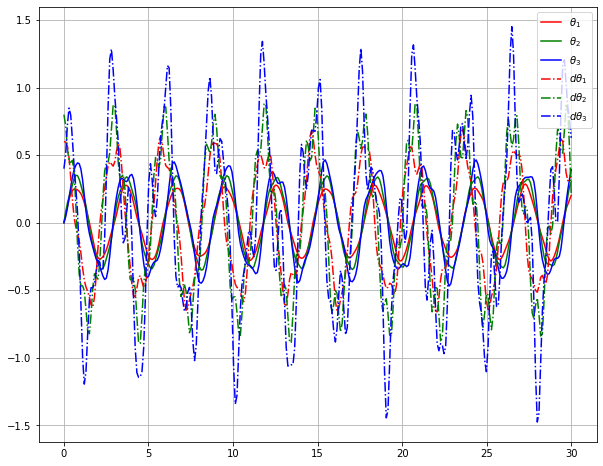

In [17]:
s3_t = s3_t_list[0]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

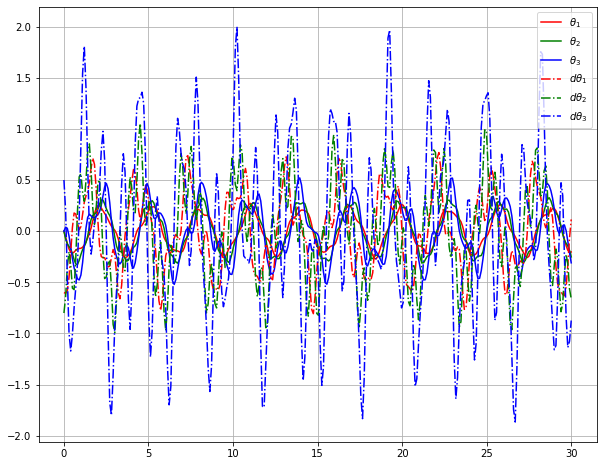

In [18]:
s3_t = s3_t_list[1]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

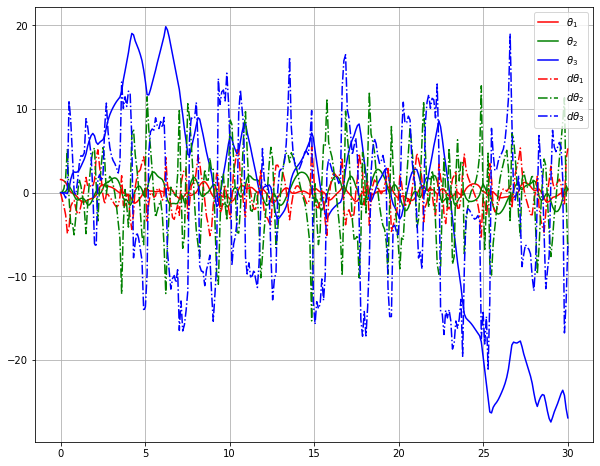

In [19]:
s3_t = s3_t_list[2]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

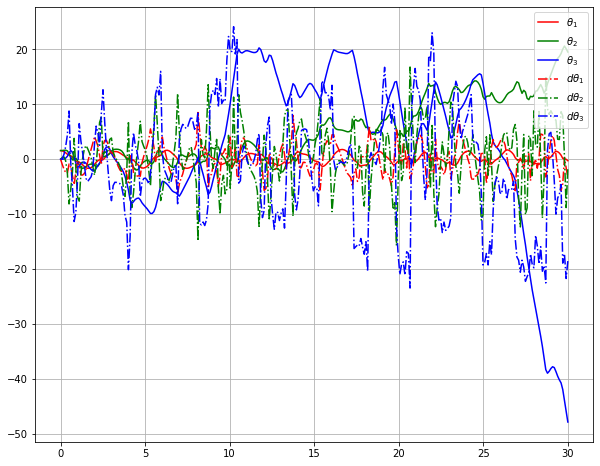

In [20]:
s3_t = s3_t_list[3]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

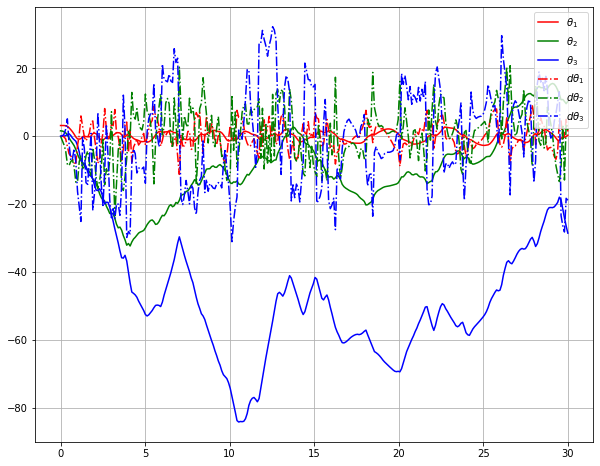

In [21]:
s3_t = s3_t_list[4]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

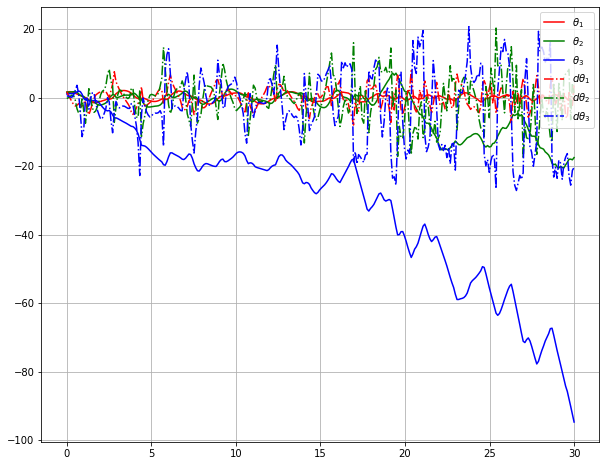

In [22]:
s3_t = s3_t_list[5]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

## Plots for differnt ICs 0.05s (Sec_sub = 20)

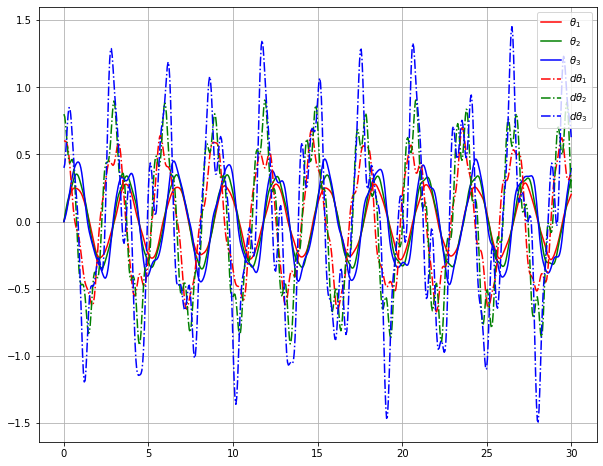

In [34]:
s3_t = s3_t_list[0]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


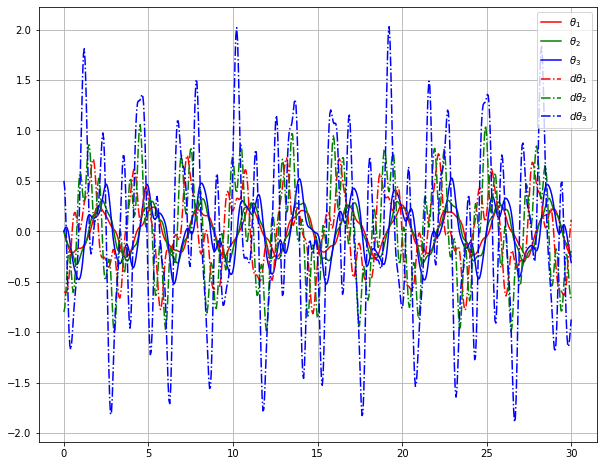

In [35]:
s3_t = s3_t_list[1]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


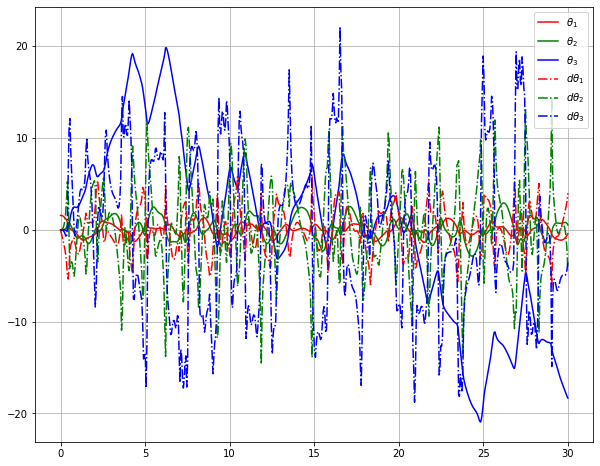

In [36]:
s3_t = s3_t_list[2]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


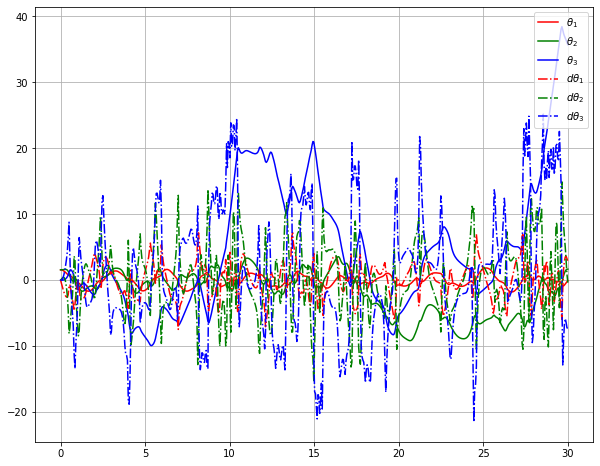

In [37]:
s3_t = s3_t_list[3]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


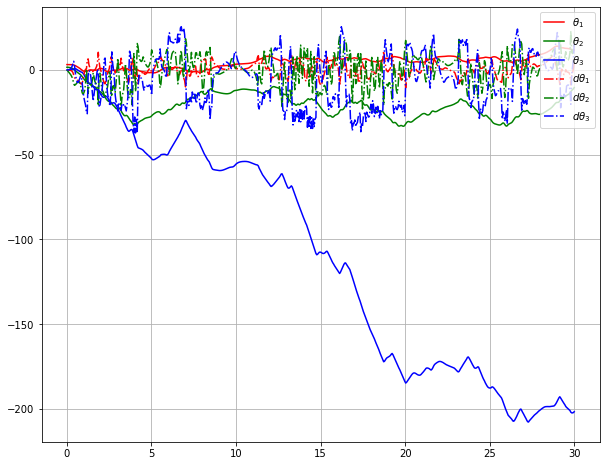

In [38]:
s3_t = s3_t_list[4]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


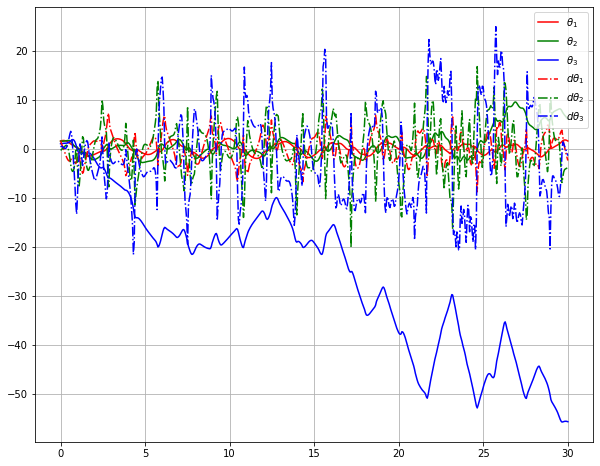

In [39]:
s3_t = s3_t_list[5]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend


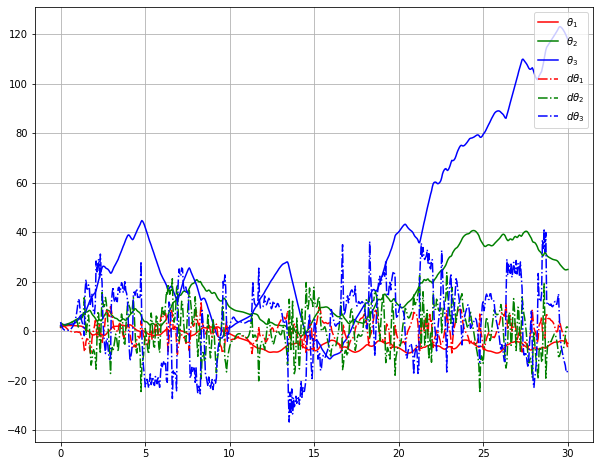

In [40]:
s3_t = s3_t_list[6]
#Now plot the angle vs time
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax3.grid() #this allows us to see the grid
ax3.plot(t,s3_t[:,0],'r',label='$\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,1],'g',label='$\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,2],'b',label='$\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.plot(t,s3_t[:,3],'-.r',label='$d\\theta_1$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,4],'-.g',label='$d\\theta_2$') #Note: when using latex in legends, use double instead of single '\' for variables
ax3.plot(t,s3_t[:,5],'-.b',label='$d\\theta_3$') #Note: when using latex in legends, use double instead of single '\' for variables

ax3.legend(loc="upper right"); #show the legend

# Animation

<IPython.core.display.Javascript object>


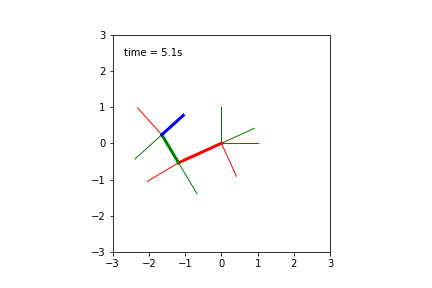

In [43]:
s3_t = s3_t_list[5]
#Simulate Output
%matplotlib notebook
from matplotlib import animation, rc #this will be used to play animations
#rc('text', usetex=True) #if you want to use latex in plot legends
from IPython.display import HTML #this is for rendering the animations

#Draw the objects
fig4 = plt.figure();
ax4 = fig4.add_subplot(111, autoscale_on=False, xlim=(-3.0, 3), ylim=(-3.0, 3.0));
ax4.set_aspect('equal')

frame_lengths = 1.0

#frames
frame_A_x_tp, = ax4.plot([0,frame_lengths], [0,0], '-',color='red', lw=1)
frame_A_y_tp, = ax4.plot([0,0], [0,frame_lengths], '-',color='green', lw=1)

frame_B_x_tp, = ax4.plot([], [], '-',color='red', lw=1)
frame_B_y_tp, = ax4.plot([], [], '-',color='green', lw=1)

frame_C_x_tp, = ax4.plot([], [], '-',color='red', lw=1)
frame_C_y_tp, = ax4.plot([], [], '-',color='green', lw=1)

frame_D_x_tp, = ax4.plot([], [], '-',color='red', lw=1)
frame_D_y_tp, = ax4.plot([], [], '-',color='green', lw=1)




#define animation structions
link1_tp, = ax4.plot([], [], '-',color='red', lw=3)
link2_tp, = ax4.plot([], [], '-',color='green', lw=3)
link3_tp, = ax4.plot([], [], '-',color='blue', lw=3)

time_template = 'time = %.1fs';
time_text_tp = ax4.text(0.05, 0.9, '', transform=ax4.transAxes); #sim time object, with location description

def rot_z_axis(th):
    R = np.matrix([[np.cos(th), -np.sin(th),0],
                   [np.sin(th), np.cos(th),0],
                   [0,0,1]])
    #this rotates a frame from F back to A through angle th on the z-axis
    return R

def draw_frames(origin, z_axis_rotation_angle):
    #leveraging the fact that all axis undergo rotation about the z axis
    y_local = np.matrix([0,1,0]).T
    x_local = np.matrix([1,0,0]).T
    th = z_axis_rotation_angle
    R = rot_z_axis(th)
    y_rot = R*y_local
    x_rot = R*x_local
    y_rot_vect = [[origin.item(0),origin.item(0)+y_rot.item(0)],
                  [origin.item(1),origin.item(1)+y_rot.item(1)]]
    
    x_rot_vect = [[origin.item(0),origin.item(0)+x_rot.item(0)],
                  [origin.item(1),origin.item(1)+x_rot.item(1)]]
    
    return x_rot_vect,y_rot_vect

def pendulum_link_ani(p_init, p_final):
    link_x = [p_init.item(0),p_final.item(0)]
    link_y = [p_init.item(1),p_final.item(1)]
    return link_x, link_y

def update_pendulum(i,link1_tp,link2_tp,link3_tp,params_tp):
    th1,th2,th3,dth1,dth2,dth3 = s3_t[i,:]
    
    P0 = np.matrix([0,0,0]).T
    
    R_BA = rot_z_axis(th1)
    L1 = params_tp['link1']['L']
    P1_local = np.matrix([0,-L1,0]).T
    P1 = R_BA*P1_local
    
    R_CA = rot_z_axis(th2)
    L2 = params_tp['link2']['L']
    P2_local = np.matrix([0,-L2,0]).T
    P2 = R_CA*P2_local + P1
    
    R_DA = rot_z_axis(th3)
    L3 = params_tp['link3']['L']
    P3_local = np.matrix([0,-L3,0]).T
    P3 = R_DA*P3_local + P2
    
    B_x_vec,B_y_vec = draw_frames(P0,th1)
    C_x_vec,C_y_vec = draw_frames(P1,th2)
    D_x_vec,D_y_vec = draw_frames(P2,th3)
    
    
    #Now update the frames
    frame_A_x_tp.set_data([0,frame_lengths], [0,0])
    frame_A_y_tp.set_data([0,0], [0,frame_lengths])
    frame_B_x_tp.set_data(B_x_vec[0],B_x_vec[1])
    frame_B_y_tp.set_data(B_y_vec[0],B_y_vec[1])
    frame_C_x_tp.set_data(C_x_vec[0],C_x_vec[1])
    frame_C_y_tp.set_data(C_y_vec[0],C_y_vec[1])
    frame_D_x_tp.set_data(D_x_vec[0],D_x_vec[1])
    frame_D_y_tp.set_data(D_y_vec[0],D_y_vec[1])
    
    #Now draw the pendulum
    link1_tp.set_data(pendulum_link_ani(P0,P1))
    link2_tp.set_data(pendulum_link_ani(P1,P2))
    link3_tp.set_data(pendulum_link_ani(P2,P3))

    
    time_text_tp.set_text(time_template % (i*dt))
    return [link1_tp, link2_tp, link3_tp],time_text_tp

robot_ani = animation.FuncAnimation(fig4, update_pendulum, np.arange(1, len(t)) , fargs=(link1_tp, link2_tp, link3_tp,params_tp),
                                   interval=50, blit=False)


plt.show()
